# REAL OR FAKE NEWS ANALYSIS

ABOUT THE DATASET

This dataset consists of about 40000 articles consisting of fake as well as real news. Our aim is train our model so that it can correctly predict whether a given piece of news is real or fake.The fake and real news data is given in two separate datasets with each dataset consisting around 20000 articles each.

## Business Objective:

1.	Need to classify the fake and real news accurately.

Architecture level analysis:

1.	Data transformation/Text processing using Python
2.	Need to get sentiments Analysis and n-gram analysis with some charts like histogram, Density plot, Barplot, pie-plot etc. 
3.	Deployment through R Shiny or Flask/ Streamlit



In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
fake=pd.read_csv('Fake.csv',encoding='latin-1')

In [4]:
true=pd.read_csv('True.csv',encoding='latin-1',error_bad_lines=False)

b'Skipping line 11067: expected 4 fields, saw 8\n'


In [5]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [6]:
true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21416 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21416 non-null  object
 1   text     21416 non-null  object
 2   subject  21416 non-null  object
 3   date     21416 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


#### so we can see that all the data in our dataset is catagorical
NOTE: You can see that all of the datetime related columns are not currently in datetime format. We will need to convert these later.

In [7]:
fake.shape

(23481, 4)

In [8]:
true.shape

(21416, 4)

fake dataset have 23481 ROWS and 4 COLUMNS

true dataset have 21416 ROWS and 4 COLUMNS

# Checking for Missing Data 

In [9]:
def missing_data(df):
    """
    Objective
    ----------
    it shows the missing data in each column with 
    total missing values, percentage of missing value and
    its data type in descending order.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
    
    returns
    ----------
    missing_data: output data frame(pandas dataframe)
    
    """
    
    total = df.isna().sum().sort_values(ascending=False)
    percent = round((df.isnull().sum()/df.isna().count()  * 100).sort_values(ascending=False))
    data_type = df.dtypes
    missing_data = pd.concat([total,percent,data_type],axis=1,keys=['Total','Percent','Data_Type']).sort_values("Total", axis = 0, ascending = False)
    
    return missing_data

In [10]:
missing_data(true)

,Total,Percent,Data_Type
title,0,0.0,object
text,0,0.0,object
subject,0,0.0,object
date,0,0.0,object


In [11]:
missing_data(fake)

,Total,Percent,Data_Type
title,0,0.0,object
text,0,0.0,object
subject,0,0.0,object
date,0,0.0,object


we can clearly conclude that we don't have any missing data in our dataset .... GOOD to GO!!

# Lets Check For Duplicates in our Dataset 

In [12]:
def drop_duplicates(df):
    """
    Objective
    ----------
    Drop duplicates rows in data frame except for the first occurrence.
    
    parameters
    ----------
    df: pandas dataframe
        input data frame 
        
    returns
    ----------
    dataframe with all unique rows
    """
        
    try:
        dr = df.duplicated().value_counts()
        print("[INFO] Dropping {} duplicates records...".format(dr))
        f_df = df.drop_duplicates(keep="first")
        
        return f_df
    except KeyError:
        print("[INFO] No duplicates records found")
        return df

In [13]:
true=drop_duplicates(true)

[INFO] Dropping False    21210
True       206
dtype: int64 duplicates records...


In [14]:
fake=drop_duplicates(fake)

[INFO] Dropping False    23478
True         3
dtype: int64 duplicates records...


In [15]:
true.shape

(21210, 4)

In [16]:
fake.shape

(23478, 4)

In [17]:
#Previously we had :                                                   After Removing Duplicates we have :

# fake dataset have 23481 ROWS and 4 COLUMNS                            fake dataset have 23478 ROWS and 4 COLUMNS

# true dataset have 21416 ROWS and 4 COLUMNS                            true dataset have 21210 ROWS and 4 COLUMNS 


### Statistics View
Now let's look at some statistics about the datasets

In [18]:
fake.describe()

,title,text,subject,date
count,23478,23478,23478,23478
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [19]:
true.describe()

,title,text,subject,date
count,21210,21210,21210,21210
unique,20825,21191,2,716
top,Factbox: Trump fills top jobs for his administ...,"CHARLESTON, S.C. (Reuters) - Long viewed by th...",politicsNews,"December 6, 2017"
freq,14,2,11219,166


# Data visualization
Now let's dive a bit deeper into the dataframes

<AxesSubplot:xlabel='subject', ylabel='count'>

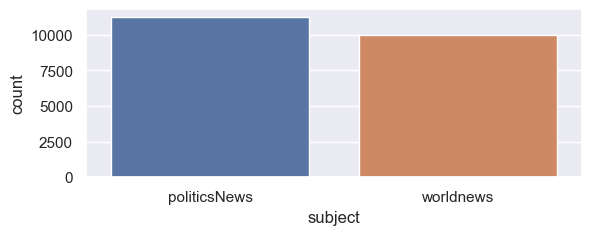

In [20]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(3.7,8.27)})
ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = true, x = 'subject', ax = ax1)

<AxesSubplot:xlabel='subject', ylabel='count'>

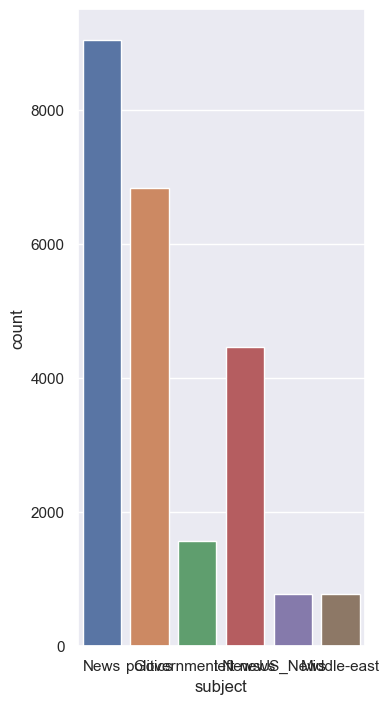

In [21]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(17,18.27)})
ax1 = fig.add_subplot(1,1,1) 
sns.countplot(data = fake, x = 'subject', ax = ax1)

After looking into the visualtion of different subject of fake news and comparing it with subjects of true news we can figure out the following things-

1)we have only 2 subjects in true ('politicsNews', 'worldnews') while fake have 6 subjects ('News', 'politics', 'Government News', 'left-news', 'US_News', 'Middle-east) .

2) since we are dealing with supervised machine learing model our ulimate goal should always be to make our model as simple as possible

with this goal we can apply some feature engineering into our fake dataset where we can merge 'News', 'left-news', 'US_News', 'Middle-east as 'worldnews' and merge 'politics', 'Government News'as 'politicsNews'



# Feature_Engineering

In [22]:
true.subject.unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [23]:
fake.subject.unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

In [24]:
fake['subject'] = fake['subject'].replace(['News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['left-news'], 'worldnews')
fake['subject'] = fake['subject'].replace(['US_News'], 'worldnews')
fake['subject'] = fake['subject'].replace(['Middle-east'], 'worldnews')
fake['subject'] = fake['subject'].replace(['politics'], 'politicsNews')
fake['subject'] = fake['subject'].replace(['Government News'], 'politicsNews')

In [25]:
fake.subject.unique()

array(['worldnews', 'politicsNews'], dtype=object)

[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

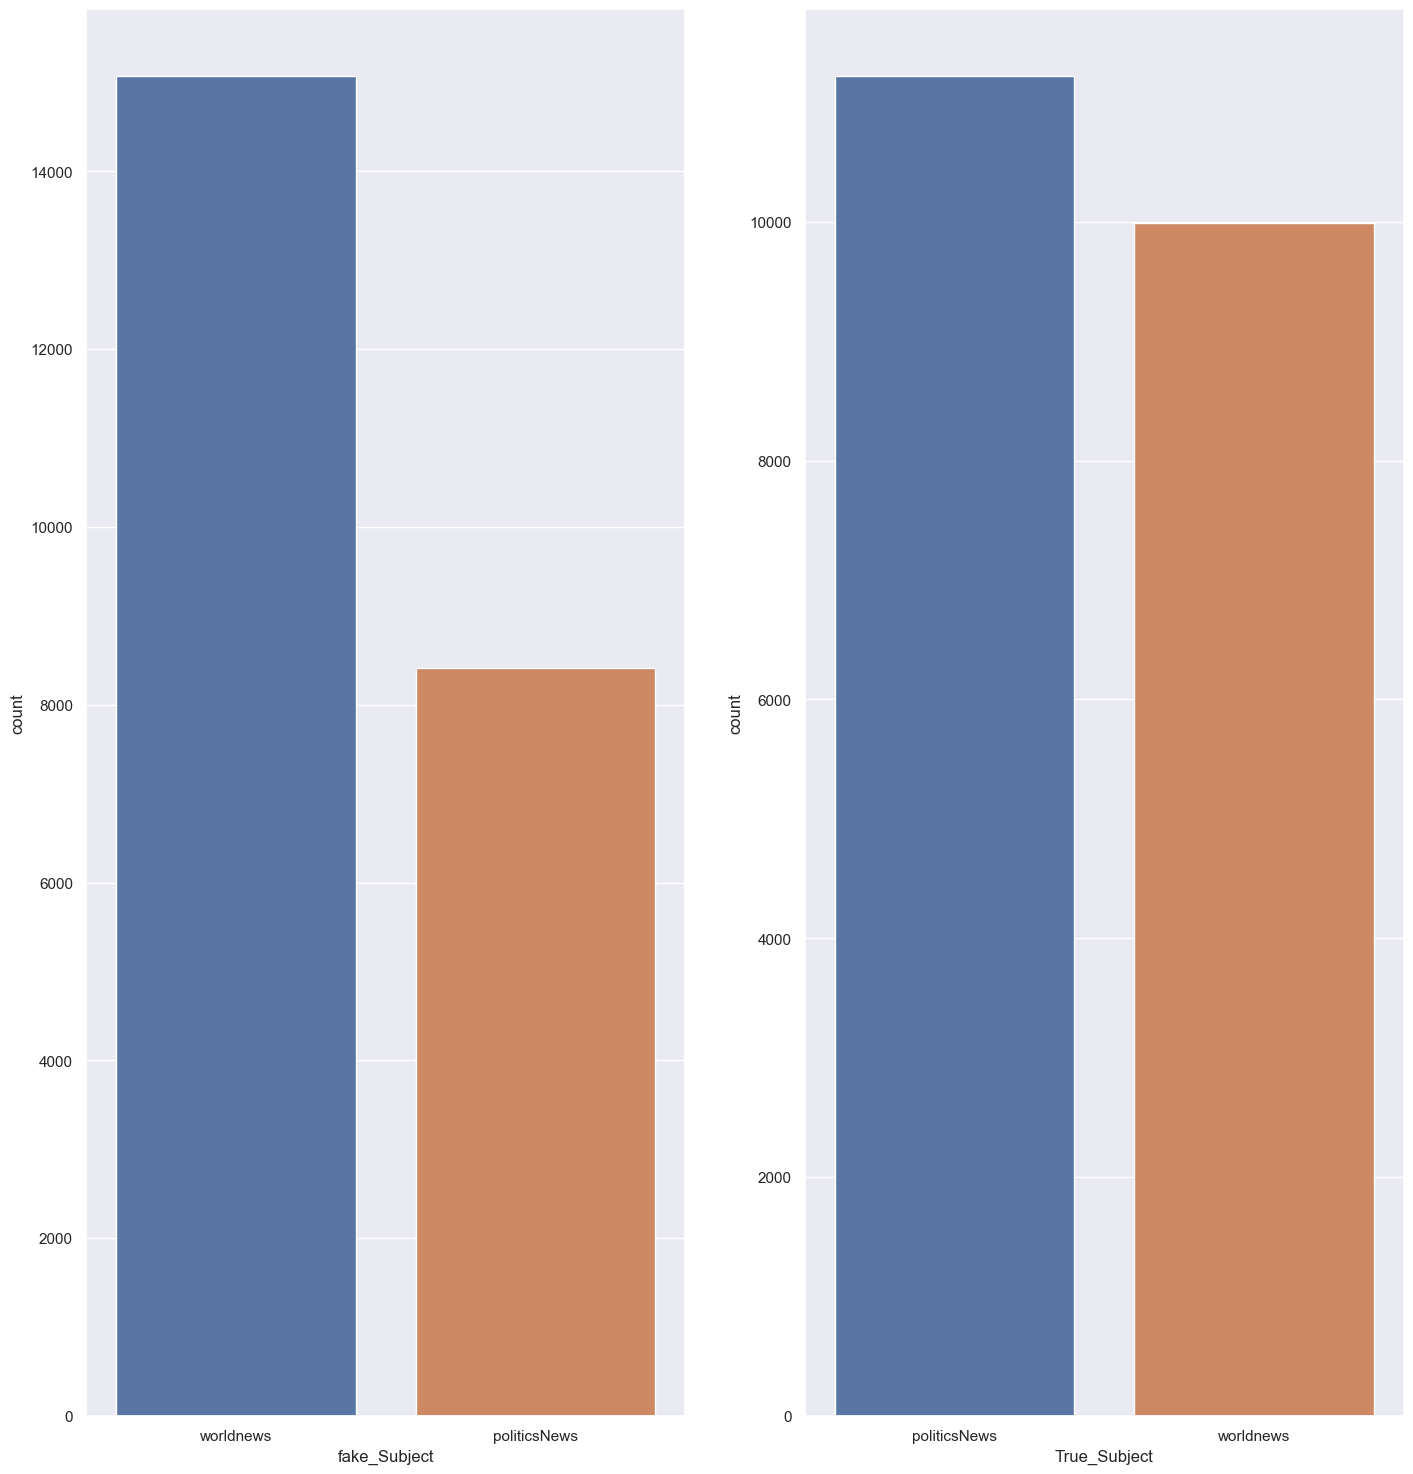

In [26]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject', ax = ax2).set(xlabel='True_Subject', ylabel='count')


# Converting the date feature into months and years

In [27]:
from datetime import datetime
import calendar
true['date'] = pd.to_datetime(true['date'], errors='coerce')
num = true['date'].dt.month

In [28]:
fake['date'] = pd.to_datetime(fake['date'], errors='coerce')
num = fake['date'].dt.month

In [29]:
true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21210 entries, 0 to 21415
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    21210 non-null  object        
 1   text     21210 non-null  object        
 2   subject  21210 non-null  object        
 3   date     21210 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 828.5+ KB


In [30]:
fake.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23478 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   title    23478 non-null  object        
 1   text     23478 non-null  object        
 2   subject  23478 non-null  object        
 3   date     23468 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 917.1+ KB


In [31]:
fake['Month'] = fake.date.apply(lambda x:x.month)
fake['Year'] = fake.date.apply(lambda x:x.year)

In [32]:
true['Month'] = true.date.apply(lambda x:x.month)
true['Year'] = true.date.apply(lambda x:x.year)

In [33]:
fake.head()

,title,text,subject,date,Month,Year
0,Donald Trump Sends Out Embarrassing New Year...,Donald Trump just couldn t wish all Americans ...,worldnews,2017-12-31,12.0,2017.0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,worldnews,2017-12-31,12.0,2017.0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",worldnews,2017-12-30,12.0,2017.0
3,Trump Is So Obsessed He Even Has Obamas Name...,"On Christmas day, Donald Trump announced that ...",worldnews,2017-12-29,12.0,2017.0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,worldnews,2017-12-25,12.0,2017.0


In [34]:
del fake['date']
del true['date']

In [35]:
true.head()

,title,text,subject,Month,Year
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,12,2017
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,12,2017
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,12,2017
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,12,2017
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,12,2017


[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

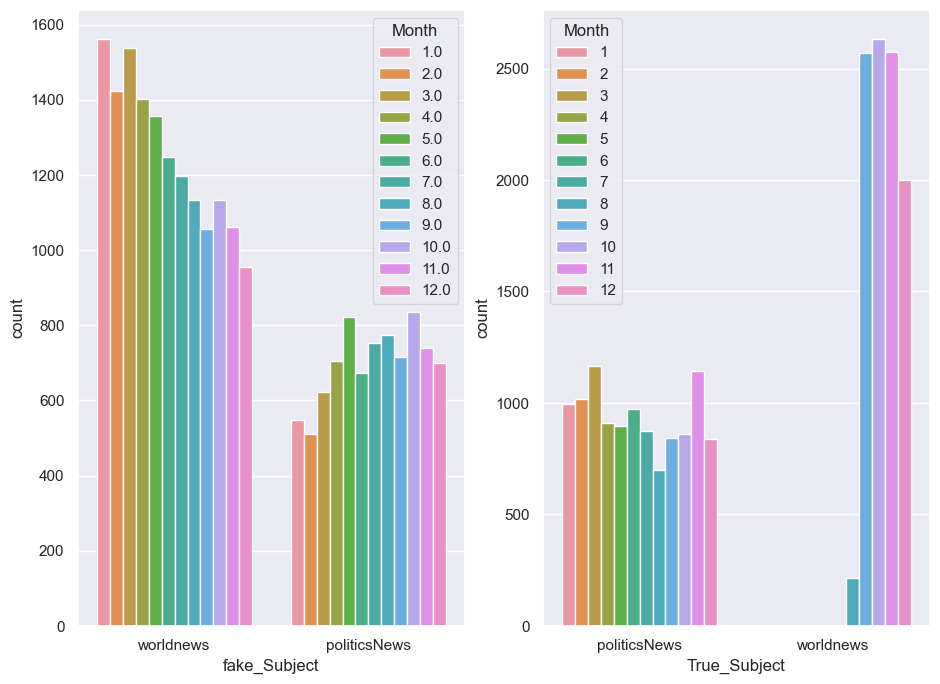

In [36]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', hue='Month',ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject',hue='Month', ax = ax2).set(xlabel='True_Subject', ylabel='count')

[Text(0.5, 0, 'True_Subject'), Text(0, 0.5, 'count')]

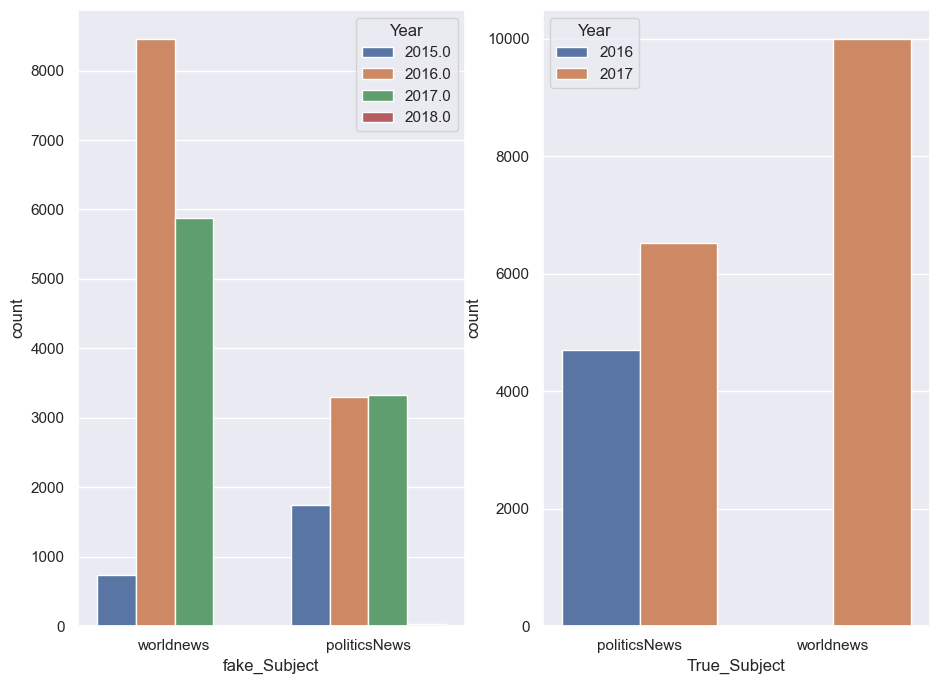

In [37]:
fig = plt.figure()
sns.set(rc={'figure.figsize':(11,8)})
ax1 = fig.add_subplot(1,2,1) 
ax2 = fig.add_subplot(1,2,2)
sns.countplot(data = fake, x = 'subject', hue='Year',ax = ax1,).set(xlabel='fake_Subject', ylabel='count')
sns.countplot(data = true, x = 'subject',hue='Year', ax = ax2).set(xlabel='True_Subject', ylabel='count')


# Data Cleaning
Now we are moving ahead with cleaning our data

Removal of HTML Contents

Removal of Punctuation Marks and Special Characters

Removal of Stopwords

Lemmatization

### First of all we are  mearging our tile,subject with text in to a single column 'text' to continue with our data cleaning process

In [38]:
fake['text']= fake['subject'] + " " + fake['title'] + " " + fake['text']
del fake['subject']
del fake['title']
fake.head()

,text,Month,Year
0,worldnews Donald Trump Sends Out Embarrassing...,12.0,2017.0
1,worldnews Drunk Bragging Trump Staffer Starte...,12.0,2017.0
2,worldnews Sheriff David Clarke Becomes An Int...,12.0,2017.0
3,worldnews Trump Is So Obsessed He Even Has Ob...,12.0,2017.0
4,worldnews Pope Francis Just Called Out Donald...,12.0,2017.0


In [39]:
true['text']= true['subject'] + " " + true['title'] + " " + true['text']
del true['subject']
del true['title']
true.head()


,text,Month,Year
0,"politicsNews As U.S. budget fight looms, Repub...",12,2017
1,politicsNews U.S. military to accept transgend...,12,2017
2,politicsNews Senior U.S. Republican senator: '...,12,2017
3,politicsNews FBI Russia probe helped by Austra...,12,2017
4,politicsNews Trump wants Postal Service to cha...,12,2017


In [40]:
from bs4 import BeautifulSoup
import re
import nltk
import string
from nltk.corpus import stopwords  

In [41]:
def remove_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()
def remove_punctuations(text):
    return re.sub('\[[^]]*\]', '', text)
def remove_characters(text):
    return re.sub("[^a-zA-Z]"," ",text)


In [42]:
def cleaning(text):
    text = remove_html(text)
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: cleaning(x)

In [43]:
true.head()

,text,Month,Year
0,"politicsNews As U.S. budget fight looms, Repub...",12,2017
1,politicsNews U.S. military to accept transgend...,12,2017
2,politicsNews Senior U.S. Republican senator: '...,12,2017
3,politicsNews FBI Russia probe helped by Austra...,12,2017
4,politicsNews Trump wants Postal Service to cha...,12,2017


In [44]:
fake.head()

,text,Month,Year
0,worldnews Donald Trump Sends Out Embarrassing...,12.0,2017.0
1,worldnews Drunk Bragging Trump Staffer Starte...,12.0,2017.0
2,worldnews Sheriff David Clarke Becomes An Int...,12.0,2017.0
3,worldnews Trump Is So Obsessed He Even Has Ob...,12.0,2017.0
4,worldnews Pope Francis Just Called Out Donald...,12.0,2017.0


# FAKE DATASET

In [45]:
fake['text']=fake['text'].apply(cleaning)


In [46]:
true['text']=true['text'].apply(cleaning)

In [47]:
fake.head()

,text,Month,Year
0,worldnews donald trump sends out embarrassing...,12.0,2017.0
1,worldnews drunk bragging trump staffer starte...,12.0,2017.0
2,worldnews sheriff david clarke becomes an int...,12.0,2017.0
3,worldnews trump is so obsessed he even has ob...,12.0,2017.0
4,worldnews pope francis just called out donald...,12.0,2017.0


In [48]:
#Word frequency for fake dataset
freq = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq

the      532274
to       298881
of       240688
and      227656
a        213759
in       168756
that     150806
s        129212
is       113405
for       96659
on        84764
trump     80454
it        79332
he        78393
was       68520
with      65286
his       59604
as        56696
this      56030
be        49426
dtype: int64

In [49]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
fake['text'] = fake['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
#word frequency after removal of stopwords in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:20] # for top 50
freq_fk

trump        80454
said         31196
president    26523
people       26377
would        23658
one          23429
us           22986
obama        19520
clinton      18865
like         17959
donald       17919
also         15245
hillary      15219
worldnews    15070
new          14998
news         14860
even         13835
white        13550
time         12941
state        12893
dtype: int64

In [51]:
#Lets perfom lamatization into entire dataset
def lemmatize_words(text):
        lemma = nltk.WordNetLemmatizer()
        words = text.split()
        words = [lemma.lemmatize(word,pos='v') for word in words]
        return ' '.join(words)

In [52]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
fake['text'] = fake['text'].apply(lemmatize_words)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anushka\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [53]:
#word frequency after lamatization in fake dataset
freq_fk = pd.Series(' '.join(fake['text']).split()).value_counts()[:100] # for top 100
freq_fk

trump        80807
say          52572
president    26523
people       26468
go           24848
             ...  
americans     6423
accord        6371
never         6367
really        6358
day           6333
Length: 100, dtype: int64

In [54]:
string_Total = " ".join(fake["text"])
string = string_Total.split(" ")

In [55]:
def n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:50]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return n_gram_df

           word  count
0      (trump,)  80807
1        (say,)  52572
2  (president,)  26523
3     (people,)  26468
4         (go,)  24848


<AxesSubplot:xlabel='count', ylabel='word'>

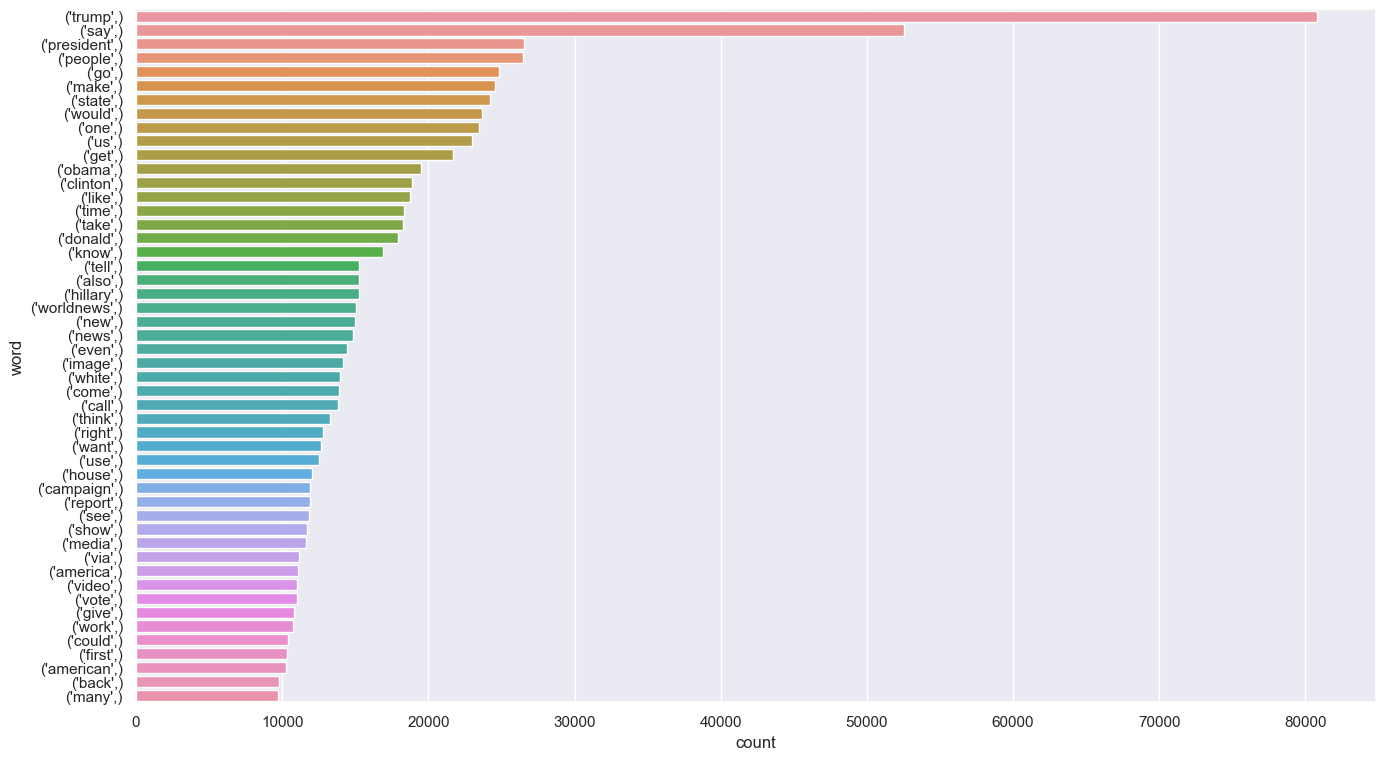

In [56]:
#Unigram Analysis
uni_f=n_gram(string,1)
sns.barplot(x='count',y='word', data=uni_f)

                 word  count
0     (donald, trump)  13766
1  (hillary, clinton)   6996
2      (white, house)   6600
3      (unite, state)   6211
4        (image, via)   6198


<AxesSubplot:xlabel='count', ylabel='word'>

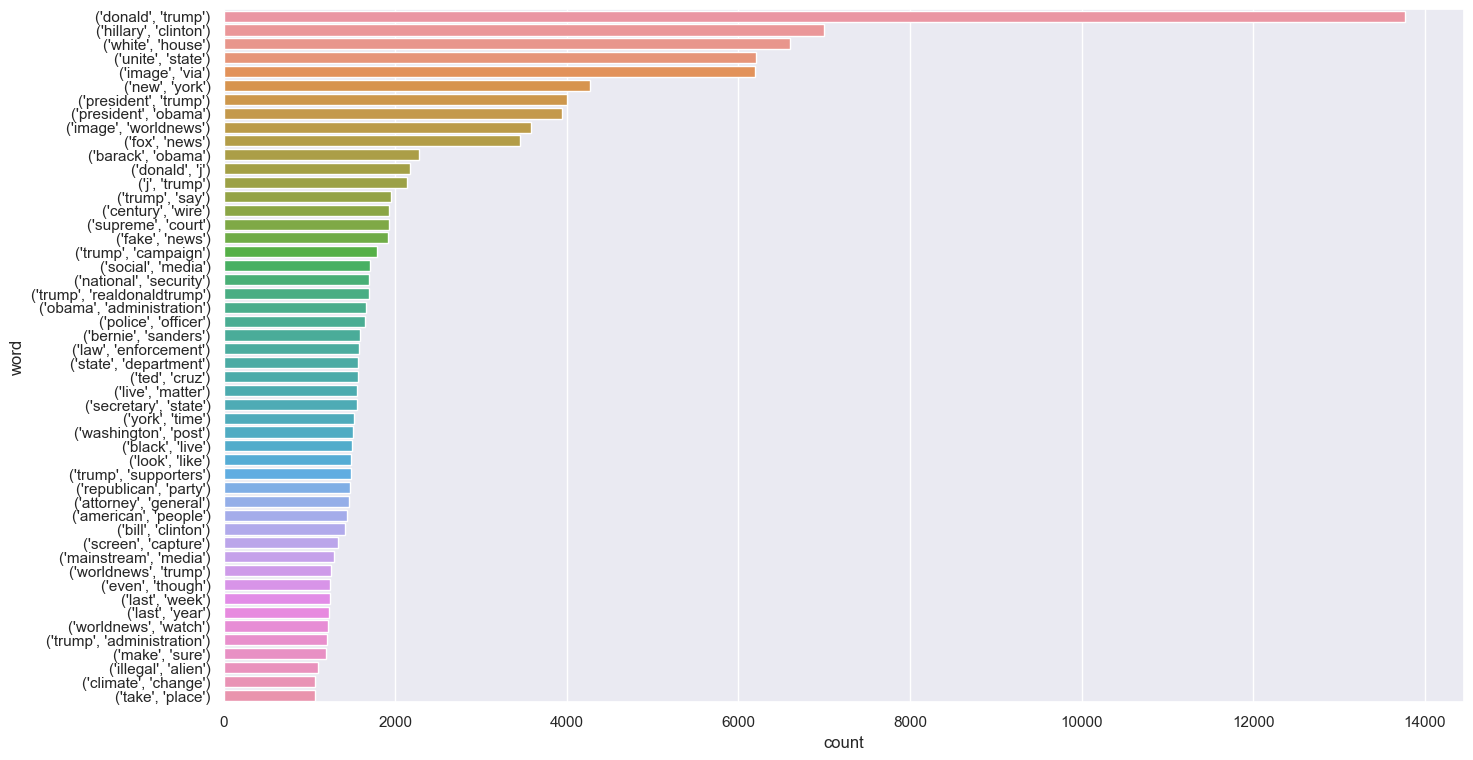

In [57]:
#Bigram Analysis
bi_f=n_gram(string,2)
sns.barplot(x='count',y='word', data=bi_f)

                           word  count
0            (donald, j, trump)   2125
1   (j, trump, realdonaldtrump)   1692
2             (new, york, time)   1517
3         (black, live, matter)   1372
4  (screen, capture, worldnews)    991


<AxesSubplot:xlabel='count', ylabel='word'>

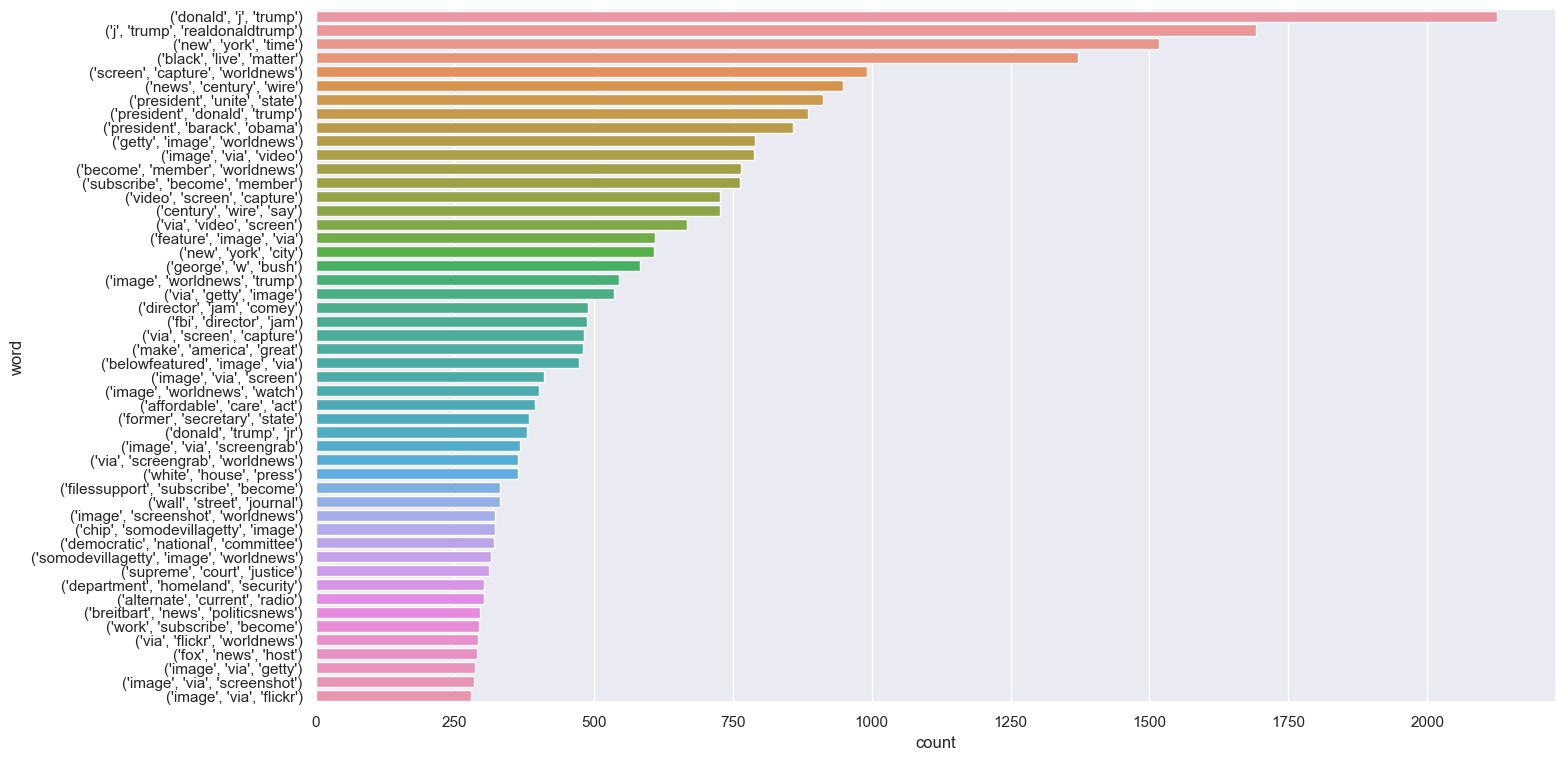

In [58]:
#Tri-gram Analysis
tri_f=n_gram(string,3)
sns.barplot(x='count',y='word', data=tri_f)

# TRUE DATASET

In [59]:
#Word frequency for true dataset
freq = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 20
freq

the      476757
to       249921
of       205526
a        196017
in       183013
and      180094
on       110289
said      97861
that      86189
for       81549
with      55359
is        55216
he        52952
as        47791
by        47674
was       47439
trump     46780
it        46289
has       45901
us        44646
dtype: int64

In [60]:
#removing stopwords
stop = stopwords.words('english')
true['text'] = true['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [61]:
#word frequency after removal of stopwords in fake dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:20] # for top 20
freq_tr

said          97861
trump         46780
us            44646
would         31380
reuters       28071
president     25720
state         19159
government    18111
house         17689
new           17495
states        16332
republican    15834
also          15764
united        15397
people        15009
told          14112
could         13757
one           12616
last          12547
washington    12172
dtype: int64

In [62]:
#Lets Perform Lamatization
true['text'] = true['text'].apply(lemmatize_words)                                       

In [63]:
#word frequency after lamatization in true dataset
freq_tr = pd.Series(' '.join(true['text']).split()).value_counts()[:100] # for top 100
freq_tr

say         116735
trump        47560
us           44646
state        35736
would        31380
             ...  
get           6702
many          6699
congress      6671
help          6613
office        6537
Length: 100, dtype: int64

In [64]:
string_Total = " ".join(true["text"])
string = string_Total.split(" ")

       word   count
0    (say,)  116735
1  (trump,)   47560
2     (us,)   44646
3  (state,)   35736
4  (would,)   31380


<AxesSubplot:xlabel='count', ylabel='word'>

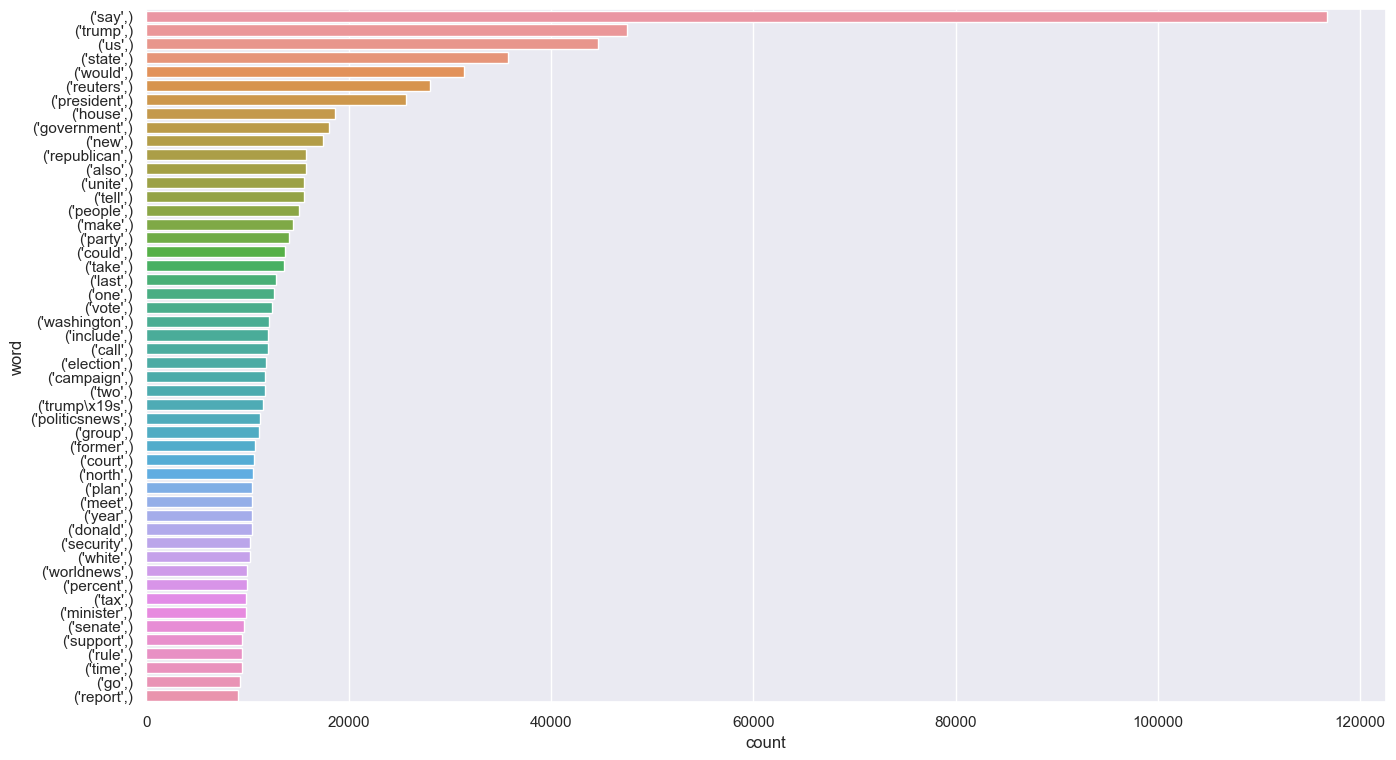

In [65]:
#Unigram Analysis
uni_t=n_gram(string,1)
sns.barplot(x='count',y='word', data=uni_t)

In [66]:
true['text']

0        politicsnews us budget fight loom republicans ...
1        politicsnews us military accept transgender re...
2        politicsnews senior us republican senator let ...
3        politicsnews fbi russia probe help australian ...
4        politicsnews trump want postal service charge ...
                               ...                        
21411    worldnews fully commit nato back new us approa...
21412    worldnews lexisnexis withdraw two products chi...
21413    worldnews minsk cultural hub become authoritie...
21414    worldnews vatican upbeat possibility pope fran...
21415    worldnews indonesia buy billion worth russian ...
Name: text, Length: 21210, dtype: object

In [67]:
df={"freq_fk":freq_fk,"freq_tr":freq_tr}

In [68]:
freq=pd.concat(df,axis=1)

In [69]:
freq

,freq_fk,freq_tr
trump,80807.0,47560.0
say,52572.0,116735.0
president,26523.0,25720.0
people,26468.0,15085.0
go,24848.0,9265.0
...,...,...
monday,NaN,6933.0
trade,NaN,6907.0
hold,NaN,6709.0
congress,NaN,6671.0


In [70]:
from xlsxwriter.utility import xl_rowcol_to_cell

In [71]:
writer_orig = pd.ExcelWriter('top_100.xlsx', engine='xlsxwriter')
freq.to_excel(writer_orig, index=True, sheet_name='report')
writer_orig.save()

In [72]:
string_Total = " ".join(true["text"])
string = string_Total.split(" ")

In [73]:
def n_gram(string,i):
    n_gram = (pd.Series(nltk.ngrams(string, i)).value_counts())[:50]
    n_gram_df=pd.DataFrame(n_gram)
    n_gram_df = n_gram_df.reset_index()
    n_gram_df = n_gram_df.rename(columns={"index": "word", 0: "count"})
    print(n_gram_df.head())
    plt.figure(figsize = (16,9))
    return n_gram_df

                    word  count
0         (unite, state)  11872
1         (white, house)   8989
2        (donald, trump)   7976
3  (washington, reuters)   6458
4    (president, donald)   5875


<AxesSubplot:xlabel='count', ylabel='word'>

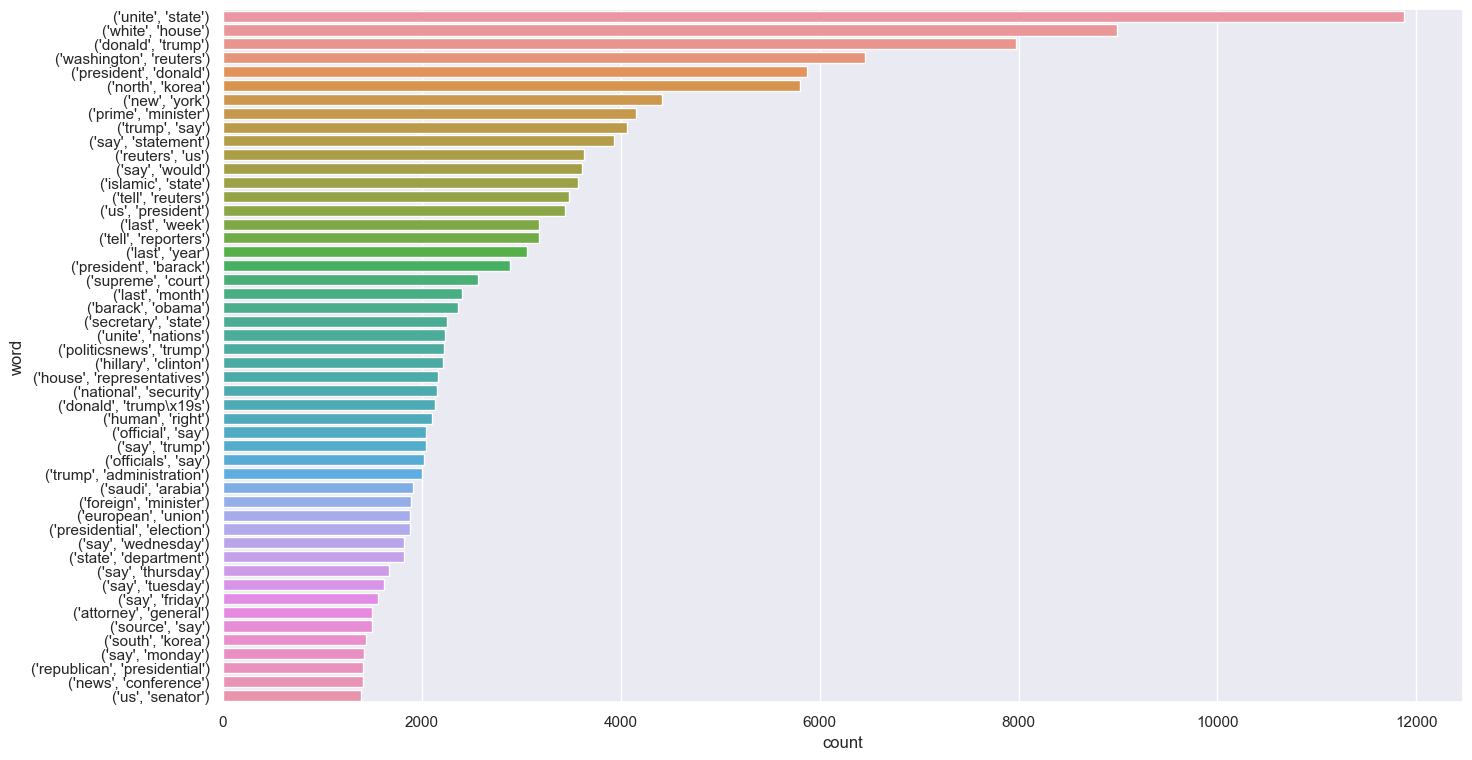

In [74]:
#biigram Analysis
bi_t=n_gram(string,2)
sns.barplot(x='count',y='word', data=bi_t)

In [75]:
df_2={"bi_f":bi_f,"bi_t":bi_t}

In [76]:
freq_bi=pd.concat(df_2,axis=1)

In [77]:
freq_bi

bi_f                               bi_t       
                        word  count                        word  count
0            (donald, trump)  13766              (unite, state)  11872
1         (hillary, clinton)   6996              (white, house)   8989
2             (white, house)   6600             (donald, trump)   7976
3             (unite, state)   6211       (washington, reuters)   6458
4               (image, via)   6198         (president, donald)   5875
5                (new, york)   4265              (north, korea)   5799
6         (president, trump)   4000                 (new, york)   4419
7         (president, obama)   3947           (prime, minister)   4153
8         (image, worldnews)   3578                (trump, say)   4059
9                (fox, news)   3458            (say, statement)   3935
10           (barack, obama)   2278               (reuters, us)   3633
11               (donald, j)   2167                (say, would)   3615
12                (j, trump)   2133            (islamic, state)   3570
13              (trump, say)   1947             (tell, reuters)   3480
14           (century, wire)   1928             (us, president)   3443
15          (supreme, court)   1928                (last, week)   3180
16              (fake, news)   1919           (tell, reporters)   3180
17         (trump, campaign)   1789                (last, year)   3055
18           (social, media)   1701         (president, barack)   2891
19      (national, security)   1694            (supreme, court)   2566
20  (trump, realdonaldtrump)   1694               (last, month)   2405
21   (obama, administration)   1655             (barack, obama)   2368
22         (police, officer)   1647          (secretary, state)   2256
23         (bernie, sanders)   1591            (unite, nations)   2234
24        (law, enforcement)   1578       (politicsnews, trump)   2228
25       (state, department)   1567          (hillary, clinton)   2215
26               (ted, cruz)   1563    (house, representatives)   2167
27            (live, matter)   1554        (national, security)   2154
28        (secretary, state)   1551           (donald, trumps)   2132
29              (york, time)   1525              (human, right)   2103
30        (washington, post)   1512             (official, say)   2047
31             (black, live)   1501                (say, trump)   2040
32              (look, like)   1487            (officials, say)   2028
33       (trump, supporters)   1486     (trump, administration)   2002
34       (republican, party)   1478             (saudi, arabia)   1916
35       (attorney, general)   1462         (foreign, minister)   1894
36        (american, people)   1440           (european, union)   1886
37           (bill, clinton)   1419    (presidential, election)   1881
38         (screen, capture)   1336            (say, wednesday)   1827
39       (mainstream, media)   1285         (state, department)   1823
40        (worldnews, trump)   1253             (say, thursday)   1675
41            (even, though)   1244              (say, tuesday)   1625
42              (last, week)   1235               (say, friday)   1561
43              (last, year)   1230         (attorney, general)   1498
44        (worldnews, watch)   1220               (source, say)   1497
45   (trump, administration)   1205              (south, korea)   1445
46              (make, sure)   1194               (say, monday)   1421
47          (illegal, alien)   1095  (republican, presidential)   1414
48         (climate, change)   1070          (news, conference)   1405
49             (take, place)   1068               (us, senator)   1385

In [78]:
writer_orig = pd.ExcelWriter('freqbi.xlsx', engine='xlsxwriter')
freq.to_excel(writer_orig, index=True, sheet_name='report')
writer_orig.save()

                           word  count
0    (president, donald, trump)   4401
1       (us, president, donald)   2500
2     (washington, reuters, us)   2346
3    (president, barack, obama)   1985
4  (president, donald, trumps)   1403


<AxesSubplot:xlabel='count', ylabel='word'>

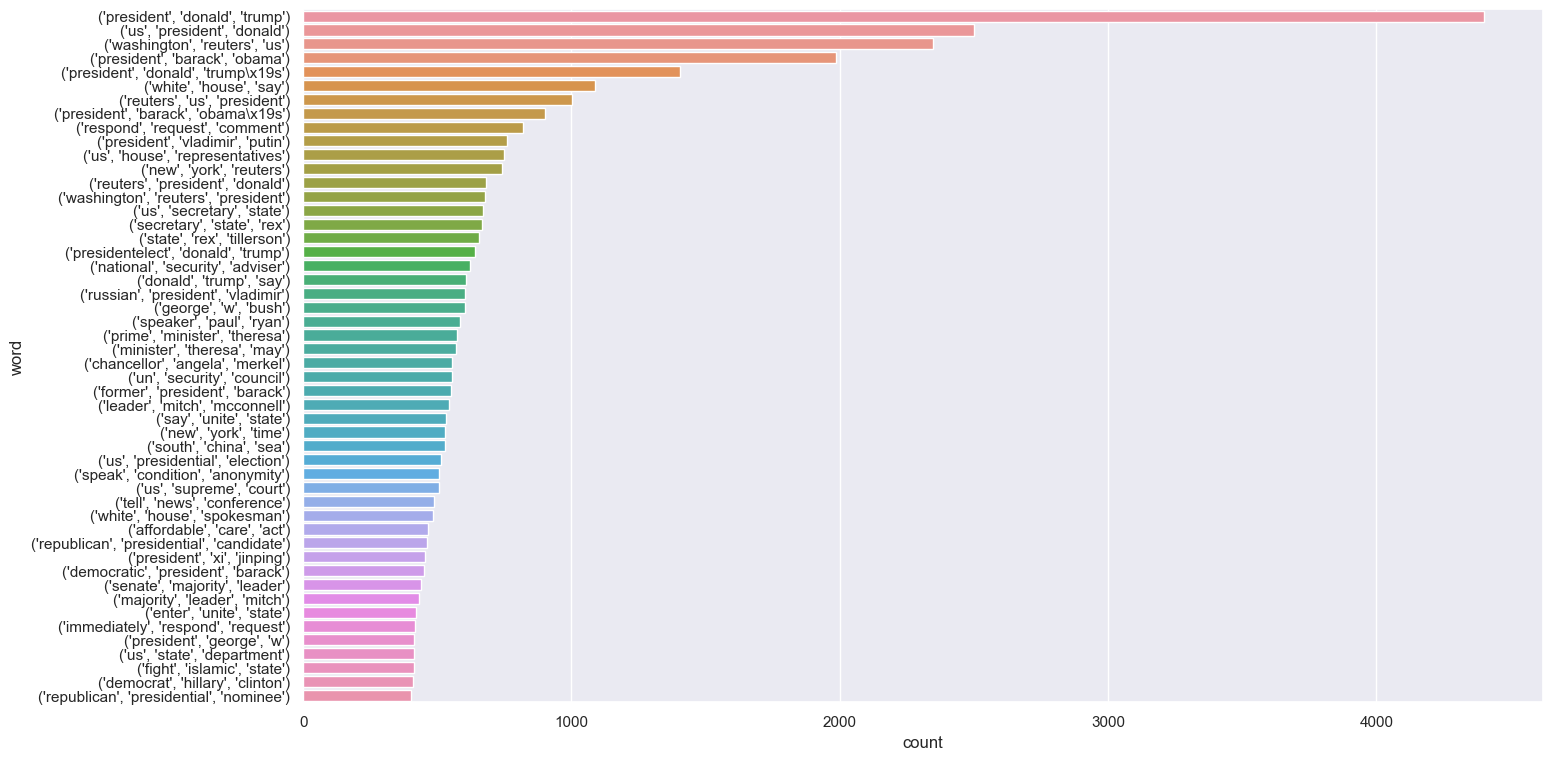

In [79]:
#Trigram Analysis
tri_t=n_gram(string,3)
sns.barplot(x='count',y='word', data=tri_t)

In [80]:
df_3={"tri_f":tri_f,"tri_t":tri_t}

In [81]:
freq_tri=pd.concat(df_3,axis=1,)

In [82]:
freq_tri

tri_f        \
                                    word count   
0                     (donald, j, trump)  2125   
1            (j, trump, realdonaldtrump)  1692   
2                      (new, york, time)  1517   
3                  (black, live, matter)  1372   
4           (screen, capture, worldnews)   991   
5                  (news, century, wire)   949   
6              (president, unite, state)   912   
7             (president, donald, trump)   885   
8             (president, barack, obama)   858   
9              (getty, image, worldnews)   790   
10                   (image, via, video)   788   
11           (become, member, worldnews)   765   
12           (subscribe, become, member)   763   
13              (video, screen, capture)   728   
14                  (century, wire, say)   727   
15                  (via, video, screen)   667   
16                 (feature, image, via)   611   
17                     (new, york, city)   609   
18                     (george, w, bush)   583   
19             (image, worldnews, trump)   546   
20                   (via, getty, image)   537   
21                (director, jam, comey)   490   
22                  (fbi, director, jam)   488   
23                (via, screen, capture)   482   
24                (make, america, great)   481   
25           (belowfeatured, image, via)   474   
26                  (image, via, screen)   411   
27             (image, worldnews, watch)   401   
28               (affordable, care, act)   394   
29            (former, secretary, state)   384   
30                   (donald, trump, jr)   379   
31              (image, via, screengrab)   367   
32          (via, screengrab, worldnews)   364   
33                 (white, house, press)   363   
34     (filessupport, subscribe, become)   332   
35               (wall, street, journal)   332   
36        (image, screenshot, worldnews)   323   
37       (chip, somodevillagetty, image)   322   
38     (democratic, national, committee)   321   
39  (somodevillagetty, image, worldnews)   316   
40             (supreme, court, justice)   311   
41      (department, homeland, security)   303   
42           (alternate, current, radio)   302   
43       (breitbart, news, politicsnews)   295   
44             (work, subscribe, become)   294   
45              (via, flickr, worldnews)   292   
46                     (fox, news, host)   290   
47                   (image, via, getty)   287   
48              (image, via, screenshot)   284   
49                  (image, via, flickr)   280   

                                    tri_t        
                                     word count  
0              (president, donald, trump)  4401  
1                 (us, president, donald)  2500  
2               (washington, reuters, us)  2346  
3              (president, barack, obama)  1985  
4            (president, donald, trumps)  1403  
5                     (white, house, say)  1089  
6                (reuters, us, president)  1003  
7            (president, barack, obamas)   900  
8             (respond, request, comment)   818  
9            (president, vladimir, putin)   761  
10           (us, house, representatives)   748  
11                   (new, york, reuters)   741  
12           (reuters, president, donald)   683  
13       (washington, reuters, president)   679  
14                 (us, secretary, state)   670  
15                (secretary, state, rex)   665  
16                (state, rex, tillerson)   654  
17        (presidentelect, donald, trump)   639  
18          (national, security, adviser)   621  
19                   (donald, trump, say)   608  
20         (russian, president, vladimir)   605  
21                      (george, w, bush)   603  
22                  (speaker, paul, ryan)   585  
23             (prime, minister, theresa)   574  
24               (minister, theresa, may)   569  
25           (chancellor, angela, merkel)   555  
26                (un, security, c

# If we look into the Tri-gram analysis we can find much difference between the fake or true dataset

# Hence we can conclude that we should consider this bi-gram analysis as an impotant feature while building our model 

In [83]:
writer_orig = pd.ExcelWriter('freqtri.xlsx', engine='xlsxwriter')
freq.to_excel(writer_orig, index=True, sheet_name='report')
writer_orig.save()

In [84]:
true['target'] = 1
fake['target'] = 0 
data=pd.concat([true,fake],ignore_index=True,sort=False)
data

,text,Month,Year,target
0,politicsnews us budget fight loom republicans ...,12.0,2017.0,1
1,politicsnews us military accept transgender re...,12.0,2017.0,1
2,politicsnews senior us republican senator let ...,12.0,2017.0,1
3,politicsnews fbi russia probe help australian ...,12.0,2017.0,1
4,politicsnews trump want postal service charge ...,12.0,2017.0,1
...,...,...,...,...
44683,worldnews mcpain john mccain furious iran trea...,1.0,2016.0,0
44684,worldnews justice yahoo settle email privacy c...,1.0,2016.0,0
44685,worldnews sunnistan us ally safe zone plan t...,1.0,2016.0,0
44686,worldnews blow million al jazeera america fina...,1.0,2016.0,0


In [85]:
from sklearn.utils import shuffle
data=shuffle(data)
data=data.reset_index(drop=True)
data.shape
data.head()

,text,Month,Year,target
0,worldnews watch catholic nun give paul ryan bi...,8.0,2017.0,0
1,worldnews italy lower house pass new electoral...,10.0,2017.0,1
2,politicsnews us house committee examine barrie...,10.0,2017.0,1
3,politicsnews cant make east chicago residents...,11.0,2015.0,0
4,politicsnews republicans rubio cruz release ta...,2.0,2016.0,1


In [86]:
stopw=['trump',	'say',	'president',	'people',	'go',	'make',	'state',	'would',	'one',	'us',	'get',	'obama',	'clinton',	'like',	'time',	'take',	'donald',	'know',	'tell',	'also',	'hillary',	'worldnews',	'new',	'news',	'even',	'image',	'white',	'come',	'call',	'think',	'right',	'want',	'use',	'house',	'campaign',	'report',	'see',	'show',	'media',	'via',	'america',	'video',	'vote',	'give',	'work',	'could',	'first',	'american',	'back',	'many',	'republican',	'ask',	'police',	'black',	'attack',	'country',	'government',	'way',	'live',	'need',	'support',	'two',	'politicsnews',	'years',	'try',	'claim',	'election',	'unite',	'party',	'last',	'group',	'leave',	'look',	'include',	'may',	'political',	'find',	'republicans',	'women',	'former',	'national',	'bill',	'world',	'watch',	'well',	'law',	'much',	'post',	'man',	'believe',	'point',	'help',	'year',	'public',	'become',	'americans',	'accord',	'never',	'really',	'day',	'reuters',	'washington',	'trumps',	'court',	'north',	'plan',	'meet',	'security',	'percent',	'tax',	'minister',	'senate',	'rule',	'force',	'officials',	'china',	'foreign',	'democratic',	'since',	'presidential',	'military',	'week',	'issue',	'deal',	'tuesday',	'russia',	'wednesday',	'statement',	'administration',	'thursday',	'korea',	'friday',	'talk',	'monday',	'trade',	'hold',	'congress',	'office',
]

In [87]:
stop.extend(stopw)

In [88]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [89]:
uni_true=['like',	'know',	'hillary',	'news',	'even',	'image',	'think',	'show',	'media',	'via',	'america',	'video',	'american',	'ask',	'police',	'black',	'way',	'live',	'try',	'claim',	'leave',	'look',	'find',	'women',	'world',	'watch',	'well',	'much',	'post',	'man',	'believe',	'point',	'public',	'become',	'americans',	'never',	'really',	'day',
]
uni_fake=['reuters',	'washington',	'trumps',	'court',	'north',	'plan',	'meet',	'security',	'percent',	'tax',	'minister',	'senate',	'rule',	'force',	'officials',	'china',	'foreign',	'democratic',	'since',	'presidential',	'military',	'week',	'issue',	'deal',	'tuesday',	'russia',	'wednesday',	'statement',	'administration',	'thursday',	'korea',	'friday',	'talk',	'monday',	'trade',	'hold',	'congress',	'office',
]

In [99]:
# from nltk.tokenize import RegexpTokenizer
# data_list=list()
# lines=data['text'].values.tolist()
# for line in lines:
#     rem_tok_punc=RegexpTokenizer(r'w+')
#     tokens=rem_tok_punc.tokenize(line)
#     words=[w.lower() for w in tokens]
#     stop_words=set(stopw + stopwords.words('english'))
#     words=[w for w in words if not w in stop_words]
#     data_list.append(words)
# len(data_list)

44688

In [110]:
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

# Preprocess your text corpus (example sentences)


# Tokenize the sentences and create a list of words
tokenized_corpus = [simple_preprocess(sentence) for sentence in data['text']]

# Train the Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)


# words = list(model.wv.vocab)
# print('size %d' % len(words))

In [117]:
def sentence_to_vectors(sentence):
    vectors = []
    for word in simple_preprocess(sentence):
        if word in model.wv:
            vectors.append(model.wv[word])
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)
x = np.array([sentence_to_vectors(sentence) for sentence in data['text']])

In [118]:
x

array([[ 0.01803243, -0.20093754,  0.5876604 , ..., -0.05960647,
         0.06152403,  0.14528486],
       [-0.7141518 , -0.6220895 , -0.6001102 , ...,  0.03551081,
         0.1186232 , -0.24155566],
       [-0.03086642, -0.21403435,  0.6739495 , ..., -0.5063891 ,
         0.11772762, -0.52012223],
       ...,
       [ 0.31361848, -0.04229267,  0.15518089, ..., -0.210504  ,
         0.3436365 ,  0.04336486],
       [ 0.37417474, -0.17314021,  0.17292345, ...,  0.05291857,
        -0.14482561, -0.05851609],
       [ 0.07553993, -0.29536453,  0.78106403, ..., -0.17661186,
        -0.11053723, -0.08533823]], dtype=float32)

In [92]:
type(wv)


NameError: name 'wv' is not defined

In [95]:
# import spacy
# spacy.cli.download("en_core_web_lg")
# nlp = spacy.load("en_core_web_lg") %tb

SystemExit: 2

In [ ]:
# import nltk
# nltk.download('punkt')

In [ ]:
# import gensim
# def tokenize(colunm):
#     tokens=nltk.word_tokenize(column)
#     return [w for w in tokens if w.isalpha()]
# column = str(data['text'])
# tokenized_words = tokenize(column)

In [ ]:
# data['tokenized']= data.apply(lambda x:tokenize(x['text']),axis=1)
# data['tokenized']

In [ ]:
response_new=data.text.apply(gensim.utils.simple_preprocess)
response_new

In [ ]:
# model=gensim.models.Word2Vec(window=5, min_count=2, workers=4, sg=0)

# # Train the model

# x=model.build_vocab(response_new, progress_per=1000).tolist()


In [96]:
import gensim.downloader as api
wv=api.load('word2vec-google-news-300')


In [97]:
def create_word_embedding_model(wv, response_new):
#     # Convert words to vectors
#     input_vectors = []
#     for sequence in response_new:
#         sequence_vectors = []
#         for word in sequence:
#             if word in wv.key_to_index:
#                 vector = wv.get_vector(word)
#                 sequence_vectors.append(vector)
#         input_vectors.append(sequence_vectors)
    
#     # Return the input vectors
#     return np.array(input_vectors)

    # Initialize a 2D array to store the sequence vectors
    input_vectors = np.zeros((len(response_new), len(response_new[0]), wv.vector_size))
    
#     # Iterate over the sequences and assign word vectors to the array
#     for i, sequence in enumerate(response_new):
#         for j, word in enumerate(sequence):
#             if word in wv.key_to_index:
#                 vector = wv.get_vector(word)
#                 input_vectors[i, j, :] = vector
    
#     return input_vectors


In [105]:
# x = create_word_embedding_model(wv, response_new)

In [113]:
x


In [ ]:
# words_series = response_new[0]

# x = {}
# input_vectors = np.zeros((len(response_new), len(response_new[0]), wv.vector_size))
# # Iterate over the words in the list
# # for word in words_series:
# #     if word in wv.key_to_index:
# #         vector = wv.get_vector(word)
# #         x[word] = vector
# #         print(f"Vector representation of '{word}': {vector}")
# #     else:
# #         print(f"No vector representation found for '{word}'.")
        
# for i, sequence in enumerate(response_new):
#     for j, word in enumerate(sequence):
#         if word in wv.key_to_index:
#             vector = wv.get_vector(word)
#             input_vectors[i, j, :] = vector
#             x[word]=input_vectors[i, j, :] 
# return input_vectors


# # for word in words_series:
# #     if word in wv.key_to_index:
# #         vector = wv.get_vector(word)
# #         print(f"Vector representation of '{word}': {vector}")
# #     else:
#         print(f"No vector representation found for '{word}'.")

KeyError: "Key 'trump' not present"

In [ ]:
# data['vec'] = data.apply(lambda x: sent_vec(x['tokenized']), axis=1)


In [119]:
y=data['target'].to_list()

In [120]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=7)

In [121]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [130]:
svc=SVC(kernel='sigmoid', gamma=1.0)
knc=KNeighborsClassifier()

dtc=DecisionTreeClassifier(max_depth=5)
lrc=LogisticRegression(solver='liblinear',penalty='l1')
rfc=RandomForestClassifier(n_estimators=50,random_state=2)
ab=AdaBoostClassifier(n_estimators=50,random_state=2)
gb=GradientBoostingClassifier(n_estimators=50,random_state=2)

In [123]:
clfs={'SVC': svc,'KN': knc , 'NB': mnb, 'DT': dtc, 'LR':lrc, 'RF':rfc , 'Adaboost': ab, 'Gdbt':gb}


In [128]:
from sklearn.metrics import accuracy_score, precision_score

In [131]:
clfs = {'SVC': svc, 'KN': knc,  'DT': dtc, 'LR': lrc, 'RF': rfc, 'Adaboost': ab, 'Gdbt': gb}
results = []  # List to store results

for clf_name, clf in clfs.items():
    clf.fit(x_train, y_train)  # Fit the algorithm on training data
    predictions = clf.predict(x_test)
    
    # Assuming you have the ground truth labels for each algorithm stored in a list named 'true_labels'
     

    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    
    results.append((clf_name, accuracy, precision))

# Print the results
for clf_name, accuracy, precision in results:
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")


Classifier: SVC
Accuracy: 0.812821660326695
Precision: 0.8006049325267567
Classifier: KN
Accuracy: 0.9532333855448646
Precision: 0.9397479954180985
Classifier: DT
Accuracy: 0.9144103826359364
Precision: 0.9127659574468086
Classifier: LR
Accuracy: 0.9686730812262251
Precision: 0.9634117921230483
Classifier: RF
Accuracy: 0.966771089729246
Precision: 0.9718779790276454
Classifier: Adaboost
Accuracy: 0.9487581114343253
Precision: 0.9451605343332552
Classifier: Gdbt
Accuracy: 0.9465204743790557
Precision: 0.9426095104239869


NameError: name 'train_classifier' is not defined

,alabaster @ file:///home/ktietz/src/ci/alabaster_1611921544520/work
0,anaconda-client==1.11.0
1,anaconda-navigator==2.3.2
2,anaconda-project @ file:///C:/Windows/TEMP/abs...
3,anyio @ file:///C:/ci/anyio_1644481921011/work...
4,appdirs==1.4.4
...,...
325,xlwings @ file:///C:/b/abs_41rmpiyy58/croots/r...
326,yapf @ file:///tmp/build/80754af9/yapf_1615749...
327,zict==2.1.0
328,zipp @ file:///C:/ci/zipp_1652273994994/work
